<a href="https://colab.research.google.com/github/ChaHyunJoon/ChaHyunJoon/blob/main/Titanic3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import missingno as msno

#warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/chahj578@korea.ac.kr 2022-11-29 16:55/Colab Notebooks/data/titanic/"
train=pd.read_csv(path+"train.csv")
test=pd.read_csv(path+"test.csv")
submission=pd.read_csv(path+"gender_submission.csv")

In [4]:
train.head()
#In this case, features are Pclass, Age, SibSp, Parch, Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()
#0이 모두  null

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
for col in train.columns:
  msg="column: {:>15}\t Proportion of null values: {:.2f}%".format(col, 100*train[col].isnull().sum()/train[col].shape[0])
  print(msg)

column:     PassengerId	 Proportion of null values: 0.00%
column:        Survived	 Proportion of null values: 0.00%
column:          Pclass	 Proportion of null values: 0.00%
column:            Name	 Proportion of null values: 0.00%
column:             Sex	 Proportion of null values: 0.00%
column:             Age	 Proportion of null values: 19.87%
column:           SibSp	 Proportion of null values: 0.00%
column:           Parch	 Proportion of null values: 0.00%
column:          Ticket	 Proportion of null values: 0.00%
column:            Fare	 Proportion of null values: 0.00%
column:           Cabin	 Proportion of null values: 77.10%
column:        Embarked	 Proportion of null values: 0.22%


In [8]:
#1.Null Data Check
for col in train.columns:
  msg='columns : {:>10}\t Percent of null values : {:.2f}%'.format(col,100*train[col].isnull().sum()/train[col].shape[0])
  print(msg)

columns : PassengerId	 Percent of null values : 0.00%
columns :   Survived	 Percent of null values : 0.00%
columns :     Pclass	 Percent of null values : 0.00%
columns :       Name	 Percent of null values : 0.00%
columns :        Sex	 Percent of null values : 0.00%
columns :        Age	 Percent of null values : 19.87%
columns :      SibSp	 Percent of null values : 0.00%
columns :      Parch	 Percent of null values : 0.00%
columns :     Ticket	 Percent of null values : 0.00%
columns :       Fare	 Percent of null values : 0.00%
columns :      Cabin	 Percent of null values : 77.10%
columns :   Embarked	 Percent of null values : 0.22%


In [9]:
for col in test.columns:
  msg='columns : {:>10}\t Percent of null values : {:.2f}%'.format(col, 100*test[col].isnull().sum()/test[col].shape[0])
  print(msg)

columns : PassengerId	 Percent of null values : 0.00%
columns :     Pclass	 Percent of null values : 0.00%
columns :       Name	 Percent of null values : 0.00%
columns :        Sex	 Percent of null values : 0.00%
columns :        Age	 Percent of null values : 20.57%
columns :      SibSp	 Percent of null values : 0.00%
columns :      Parch	 Percent of null values : 0.00%
columns :     Ticket	 Percent of null values : 0.00%
columns :       Fare	 Percent of null values : 0.24%
columns :      Cabin	 Percent of null values : 78.23%
columns :   Embarked	 Percent of null values : 0.00%


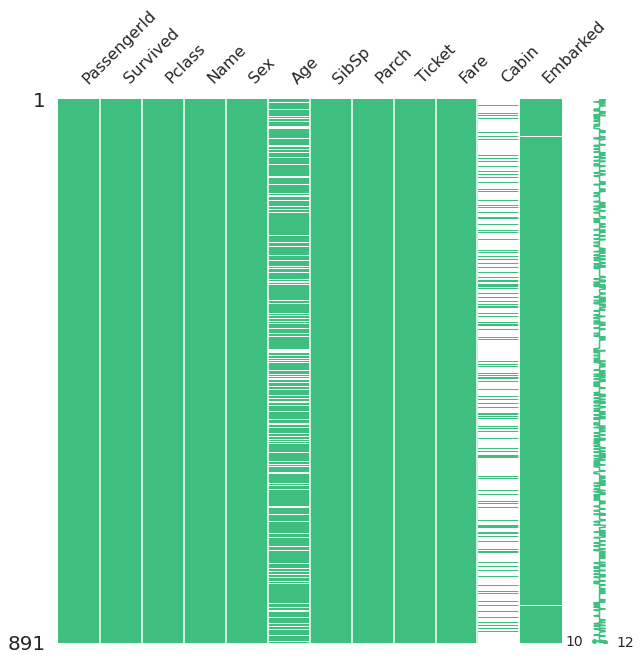

In [10]:
msno.matrix(df=train.iloc[:,:], figsize=(10,10), color=(0.25, 0.75, 0.5))

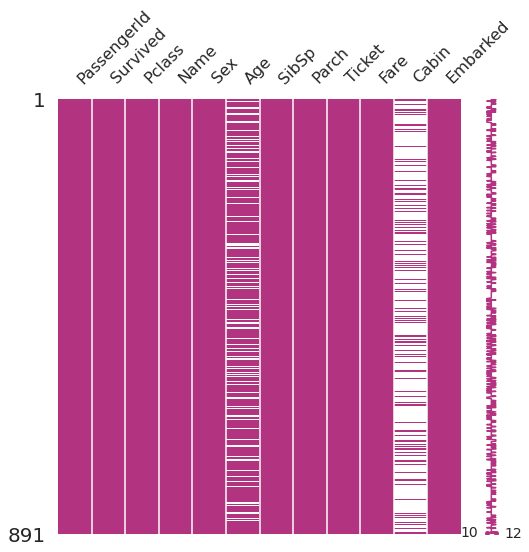

In [11]:
msno.matrix(df=train.iloc[:,:], figsize=(8, 8), color=(0.7, 0.2, 0.5))

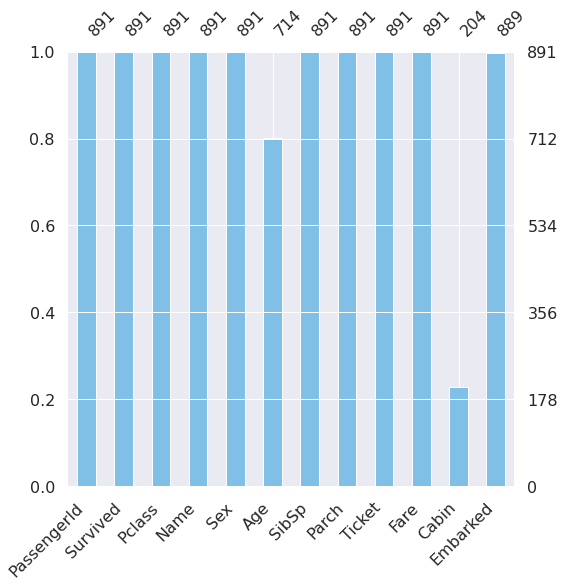

In [12]:
msno.bar(df=train.iloc[:,:], figsize=(8, 8), color=(0.5, 0.75, 0.9))

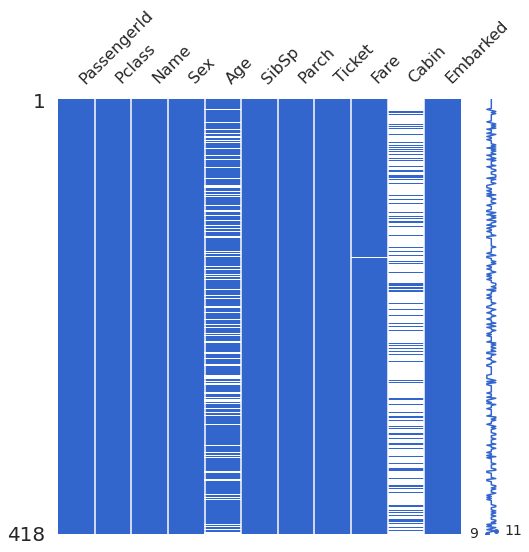

In [13]:
msno.matrix(df=test.iloc[:, :], figsize=(8,8), fontsize=16, color=(0.2, 0.4, 0.8))

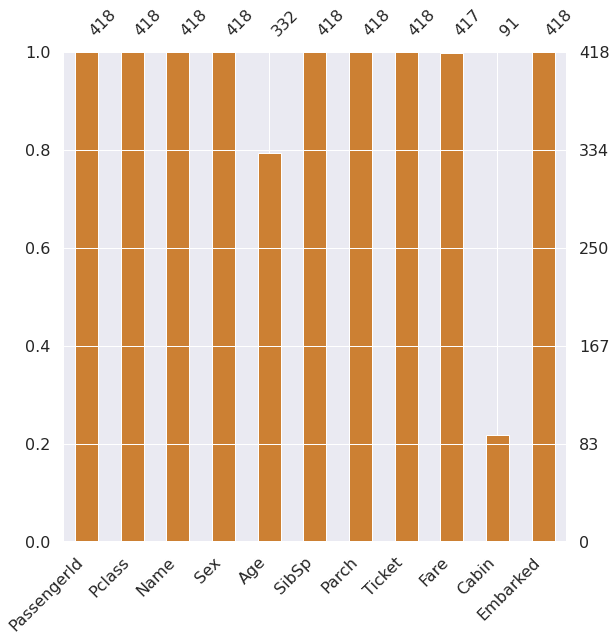

In [14]:
msno.bar(df=test.iloc[:, :], figsize=(9, 9), color=(0.8, 0.5, 0.2))

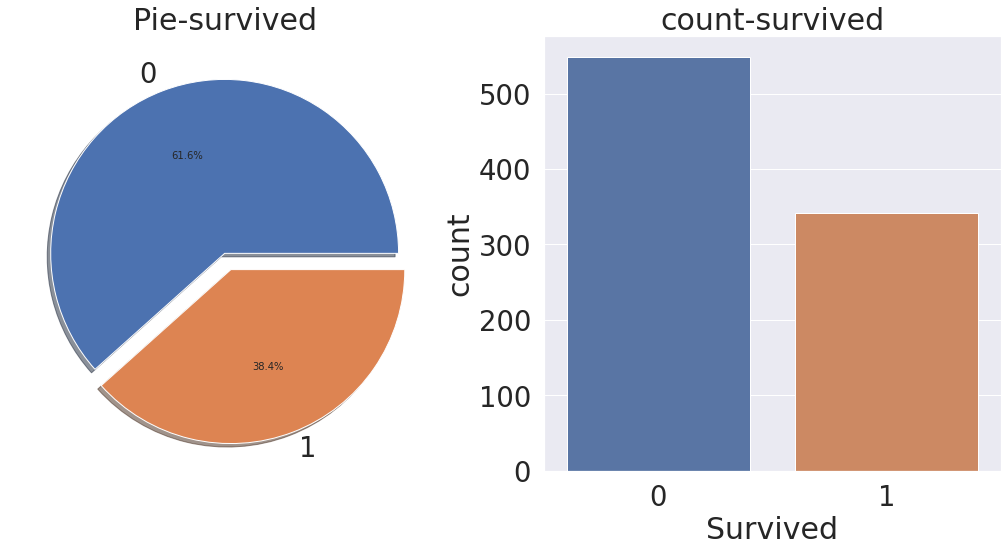

In [15]:
#타겟 라벨 확인
f, ax=plt.subplots(1, 2, figsize=(18, 8))

train["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie-survived")
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title("count-survived")

plt.show()
##죽은 사람이 61.6%, 산 사람이 38.4%

In [16]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean() #percentage of survival by class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).agg(['mean', 'sum']) #percentage and number of the survived

Survived     
            mean  sum
Pclass               
1       0.629630  136
2       0.472826   87
3       0.242363  119

In [18]:
#Exploratory Data Analysis -시각화 lib=pyplot, seaborn, plotly

#1. Pclass에 따른 생존률 차이
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count() #각 클래스에 몇명의 인원이 타고 있었는지

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum() #생존자가 1로 계산되므로 이는 생존자의 수를 의미함

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


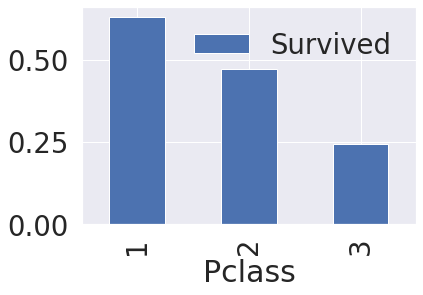

In [21]:
#bar형태로 나타낼때
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

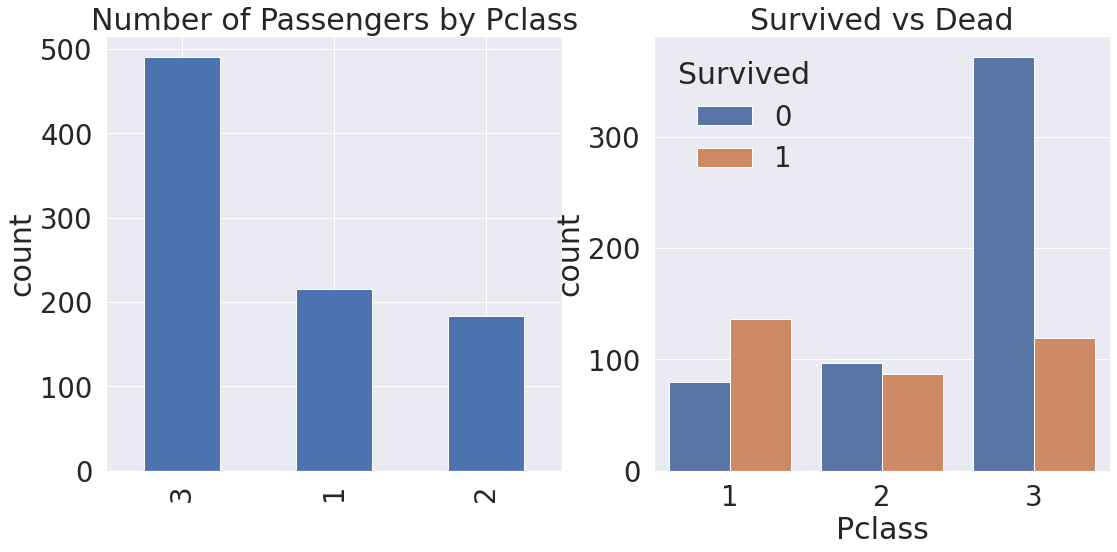

In [22]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
train.Pclass.value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title("Survived vs Dead")
ax[1].set_ylabel('count')

plt.show()

#Pclass=1인 승객들의 생존률이 제일 높았음. Pclass라는 index는 생존률에 지대한 영향을 끼친다.

Text(0.5, 1.0, 'Survived male vs female')

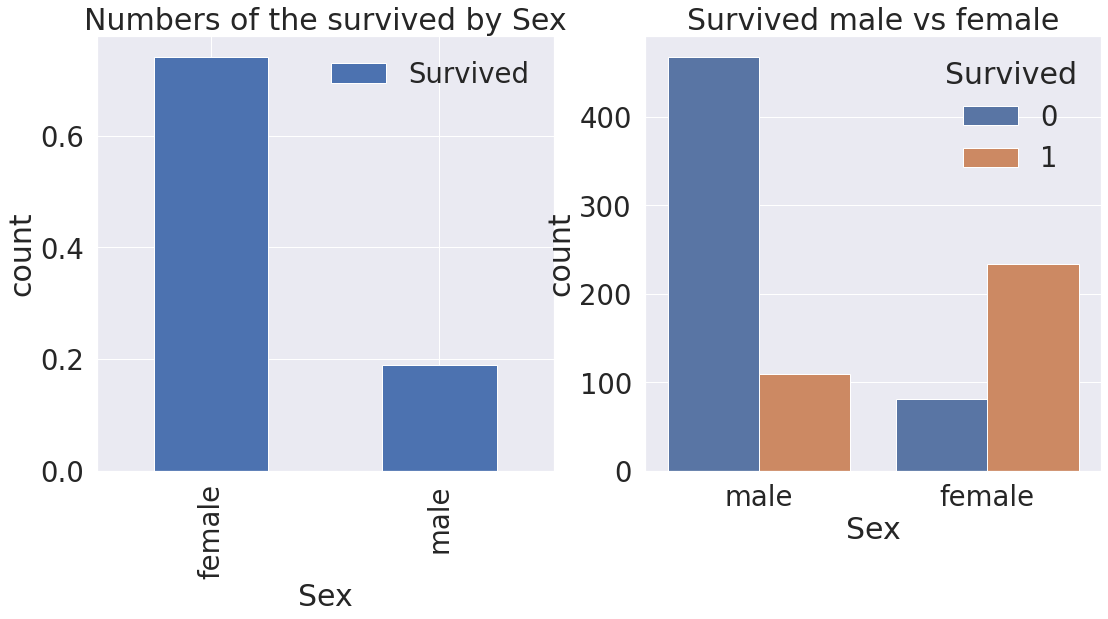

In [23]:
#Sex

f, ax=plt.subplots(1, 2, figsize=(18, 8))

train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0]) #hue를 굳이 쓸 필요 없음.
ax[0].set_title('Numbers of the survived by Sex')
ax[0].set_ylabel('count')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1]) #hue=주석
ax[1].set_title('Survived male vs female')

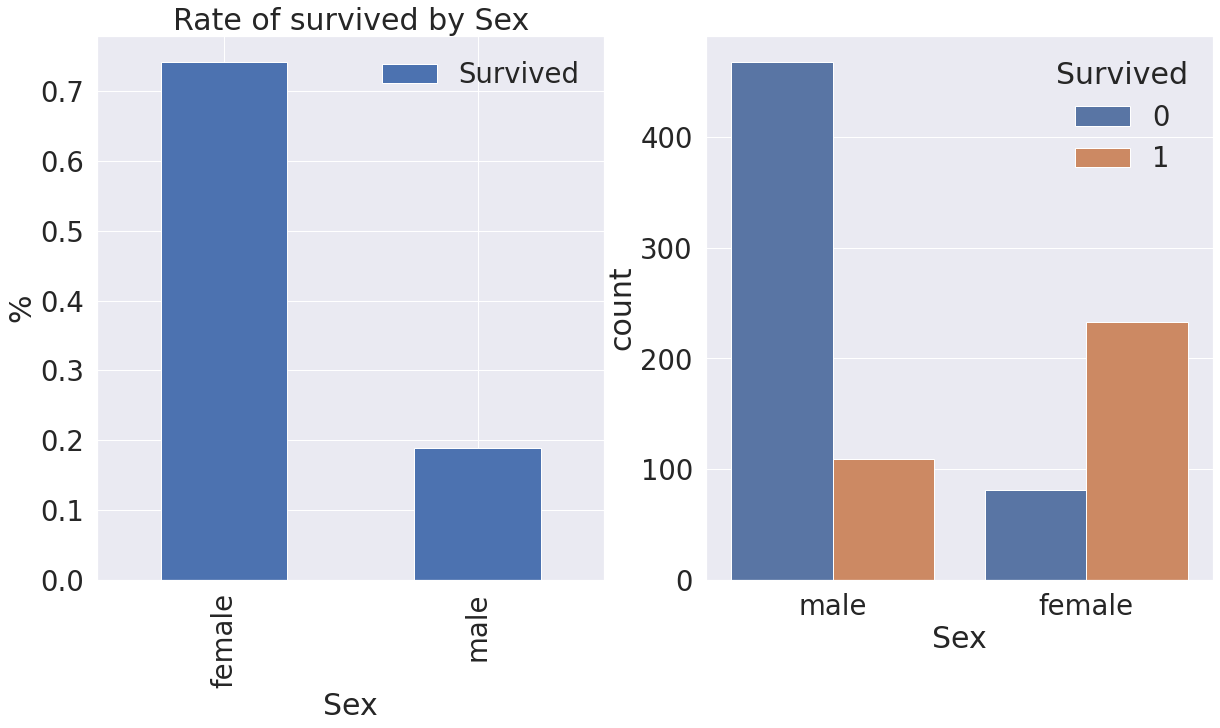

In [24]:
f, ax=plt.subplots(1, 2, figsize=(20, 10))

train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Rate of survived by Sex')
ax[0].set_ylabel("%")
sns.countplot('Sex', data=train, hue='Survived', ax=ax[1])

#여자가 생존률 높음

In [25]:
train[["Survived", "Sex"]].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [26]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived')

,Survived
Sex,
male,0.188908
female,0.742038


In [27]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='winter')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


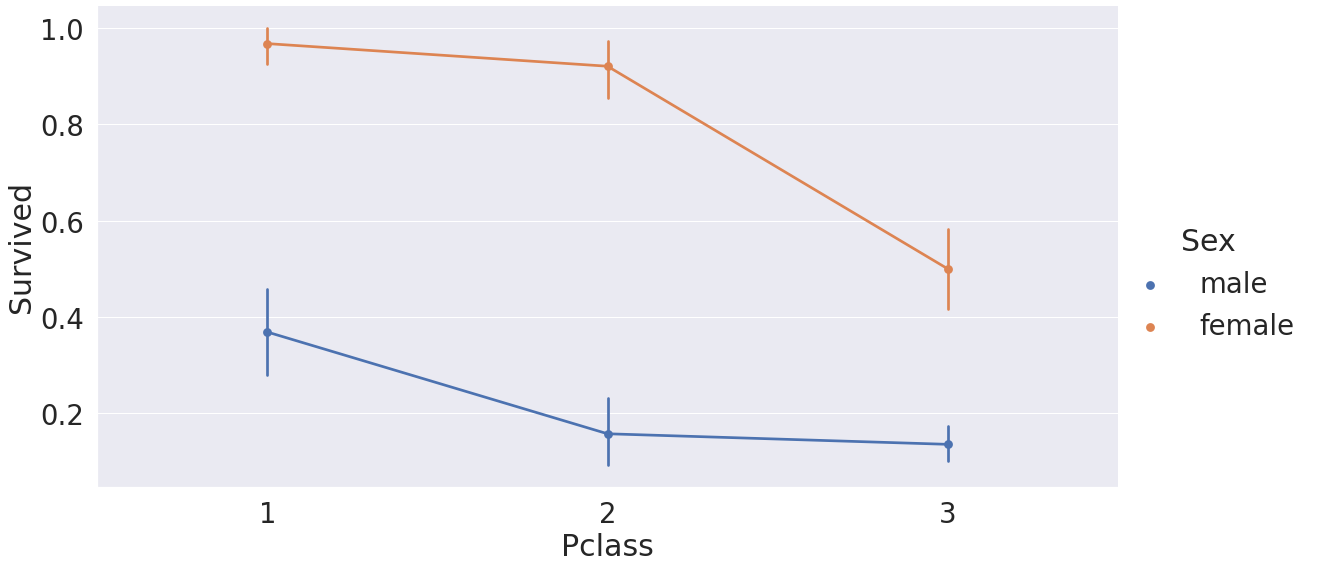

In [28]:
#Sex and Pclass
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=8, aspect=2) #size= 위아래 크기, aspect= 좌우의 크기
#1. 여자일수록 살 확률이 높아진다. If u are a women, u have more probability of survival
#2. Pclass가 높을수록 생존율이 높아진다. Higher Pclass, Higher likelihood of saving life

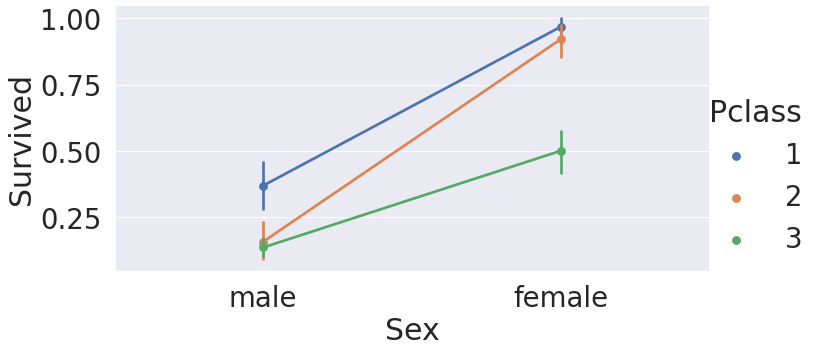

In [29]:
sns.factorplot('Sex', 'Survived', hue='Pclass', data=train, size=5, aspect=2)
#내 기준에선 이 데이터가 더 선명한 결과값을 도출함

In [30]:
# Age

print(f'제일 나이 많은 승객 : {train.Age.max()}years')
print(f'제일 나이 어린 승객 : {train.Age.min()}years')
print(f'승객들의 평균 나이 : %1.1f years' %(train.Age.mean()))

제일 나이 많은 승객 : 80.0years
제일 나이 어린 승객 : 0.42years
승객들의 평균 나이 : 29.7 years


In [31]:
print(f'The most elder man\'s age : {train.Age.max()}')
print(f'People\'s avg age = %1.1f'%(train.Age.mean()))

The most elder man's age : 80.0
People's avg age = 29.7


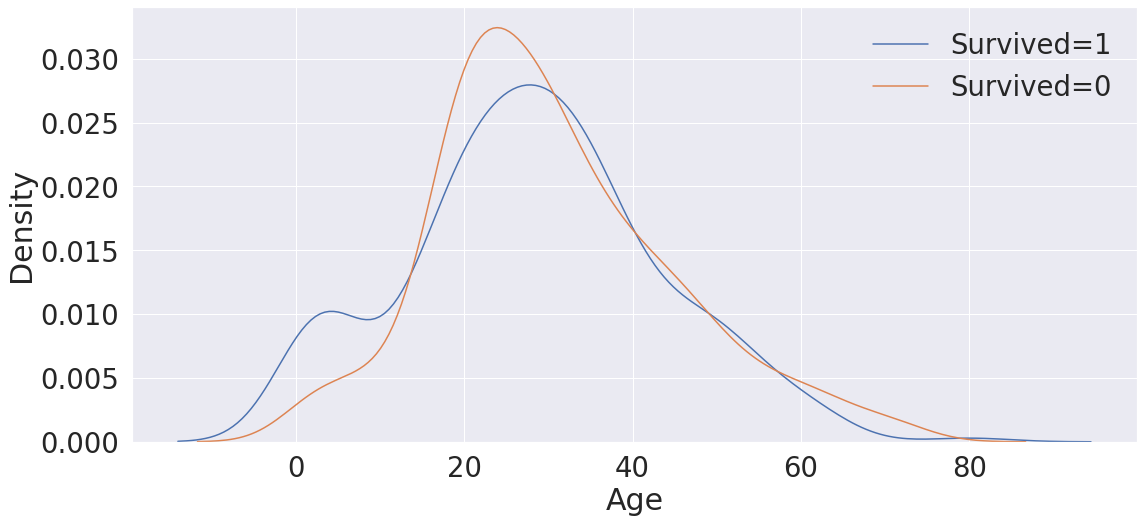

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.kdeplot(train[train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived=1', 'Survived=0'])
plt.show()
#Kernel Density Expectation plot (커널 밀도 추정 함수 -> 데이터의 분포를 확인할 때 주로 사용하는 함수)
#생존자들은 대체로 젊은 편

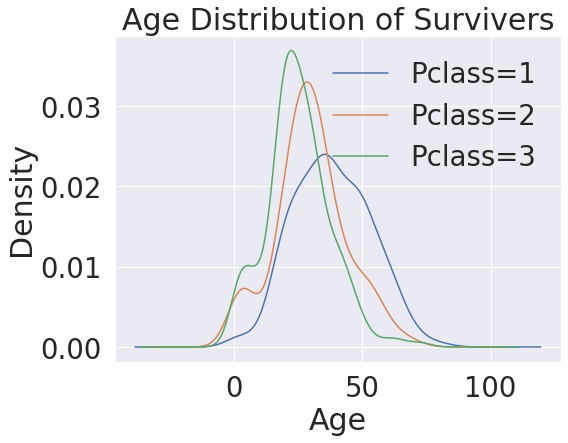

In [33]:
plt.figure(figsize=(8, 6))
train['Age'][train.Pclass==1].plot(kind='kde')
train['Age'][train.Pclass==2].plot(kind='kde')
train['Age'][train.Pclass==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution of Survivers')
plt.legend(['Pclass=1', 'Pclass=2', 'Pclass=3'])

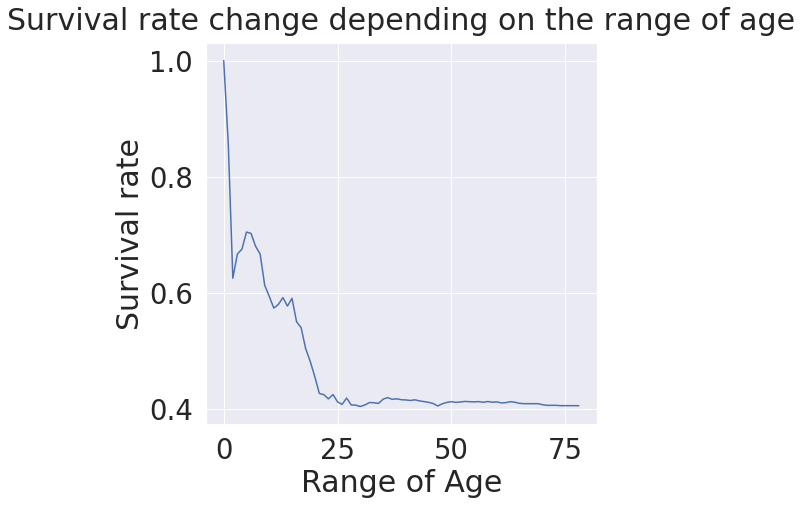

In [34]:
cummulate_survival_ratio=[]
for age in range(1, 80):
  cummulate_survival_ratio.append(train[train['Age']<age]['Survived'].sum()/len(train[train['Age']<age]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on the range of age', y=1.02) #y=제목의 높이 (default=1)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age')
plt.show()

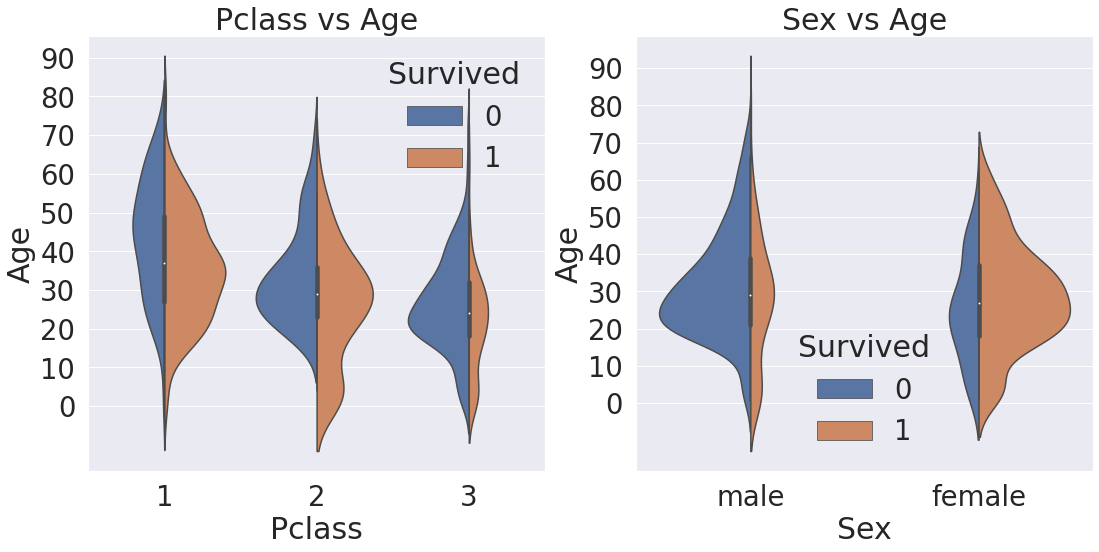

In [35]:
# Pclass, Sex, Age에 관한 도포를 모두 보고싶다면? violin plot
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass vs Age')
ax[0].set_yticks(range(0, 100, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex vs Age')
ax[1].set_yticks(range(0, 100, 10))
plt.show()
#left=Pclass & Age
#right=Sex & Age

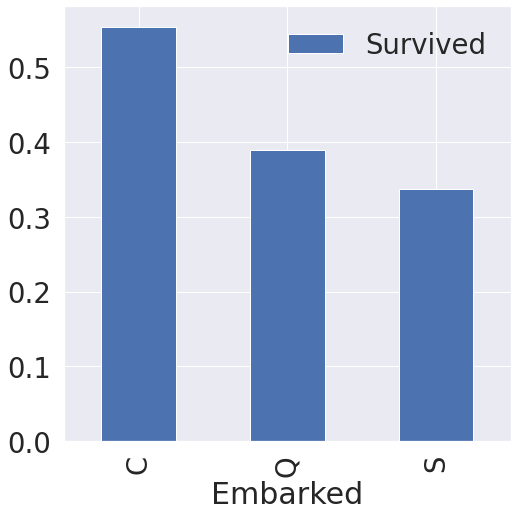

In [36]:
#Embarked : 탑승한 항구
f, ax=plt.subplots(1, 1, figsize=(8, 8))
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().plot.bar(ax=ax)

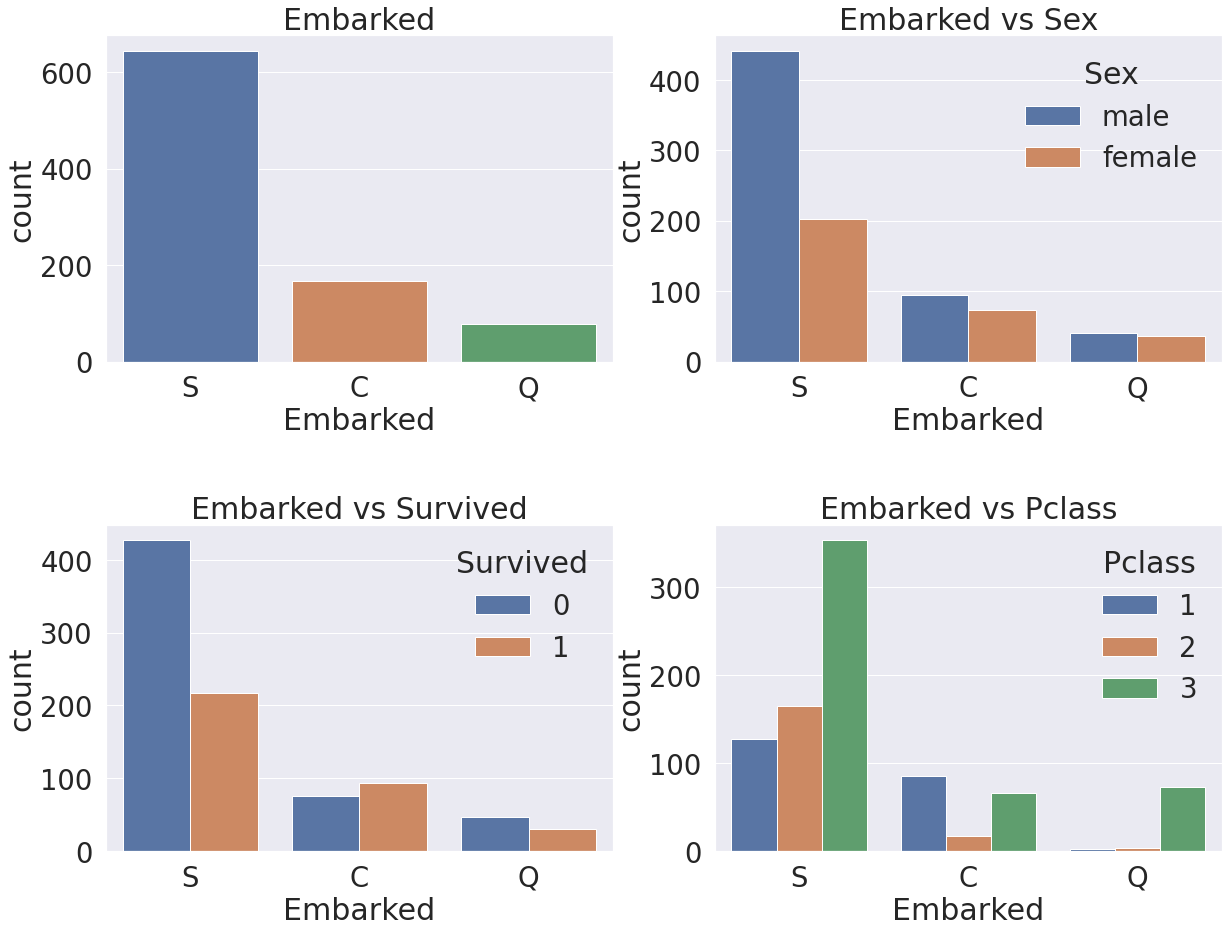

In [37]:
#Embarked vs Sex, Pclass, Survived
f, ax= plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0, 0].set_title('Embarked')
sns.countplot('Embarked', data=train, hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('Embarked vs Sex')
sns.countplot('Embarked', data=train, hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', data=train, hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [38]:
#Family = SibSp, Parch
train['FamilySize']=train['SibSp']+train['Parch'] + 1
test['FamilySize']=test['SibSp']+test['Parch'] + 1

In [39]:
print(f'Maximum size of FamilySize = ', train['FamilySize'].max())
print(f'Minimum size of FamilySize = ', train['FamilySize'].min())

Maximum size of FamilySize =  11
Minimum size of FamilySize =  1


Text(0.5, 1.0, 'Proportion of Survived by FamilySize')

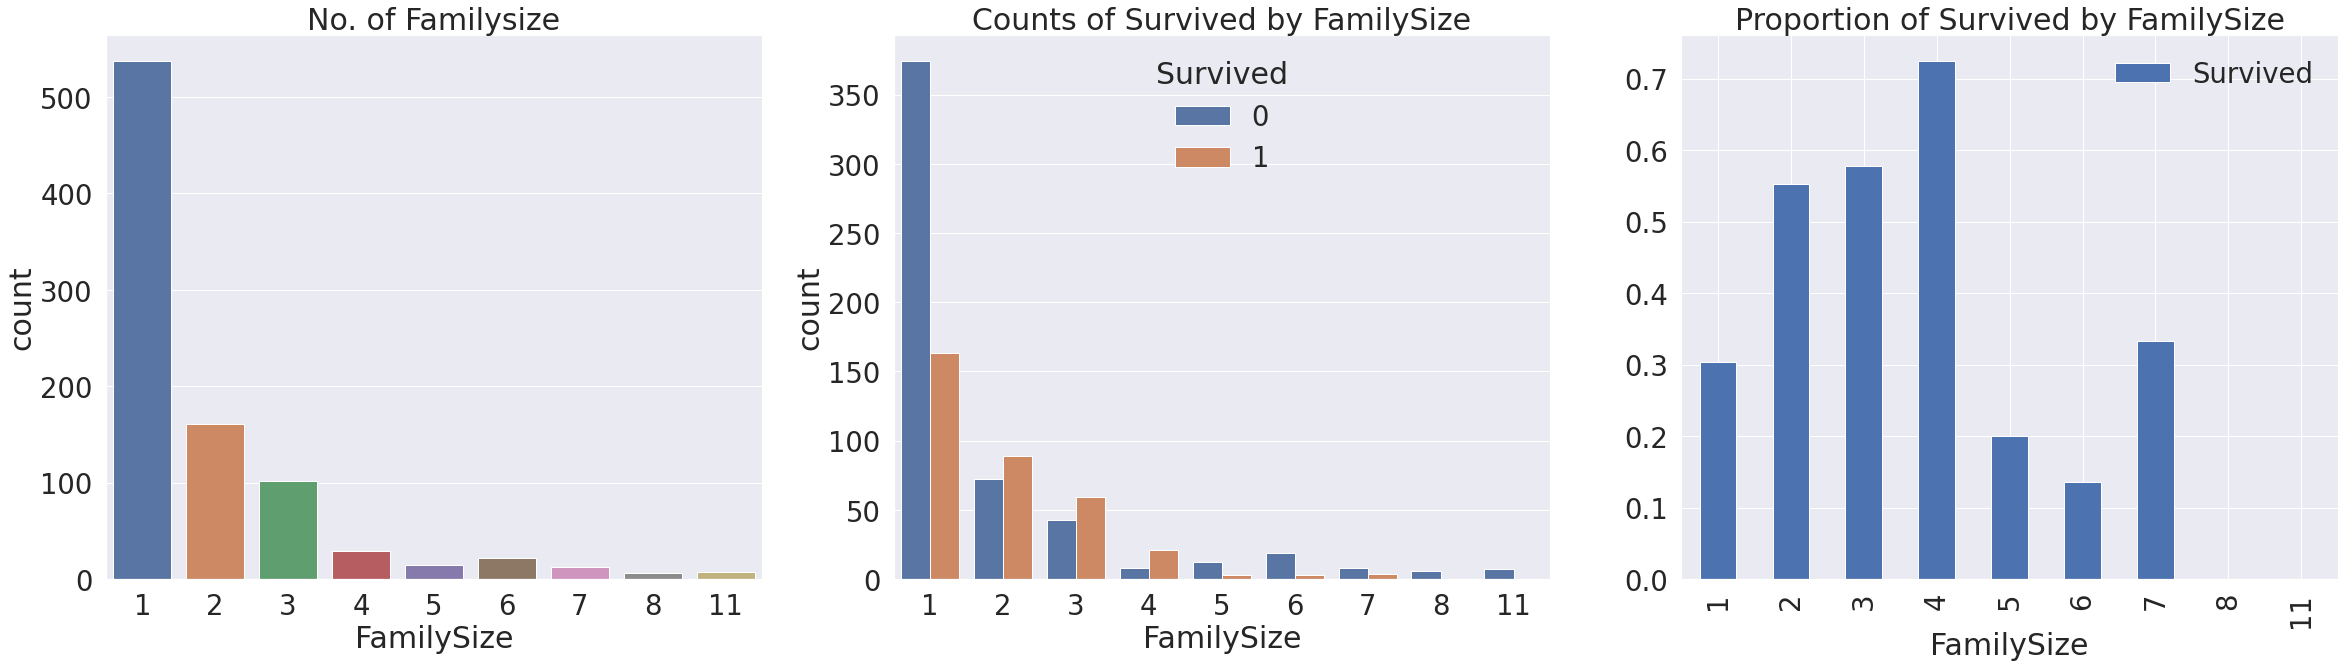

In [40]:
f, ax= plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=train, ax=ax[0])
ax[0].set_title('No. of Familysize')
sns.countplot('FamilySize', data=train, hue='Survived', ax=ax[1])
ax[1].set_title('Counts of Survived by FamilySize')
train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=True).mean().plot.bar(ax=ax[2])
ax[2].set_title('Proportion of Survived by FamilySize')

Text(0.5, 1.0, 'Proportion of Survived by FamilySize')

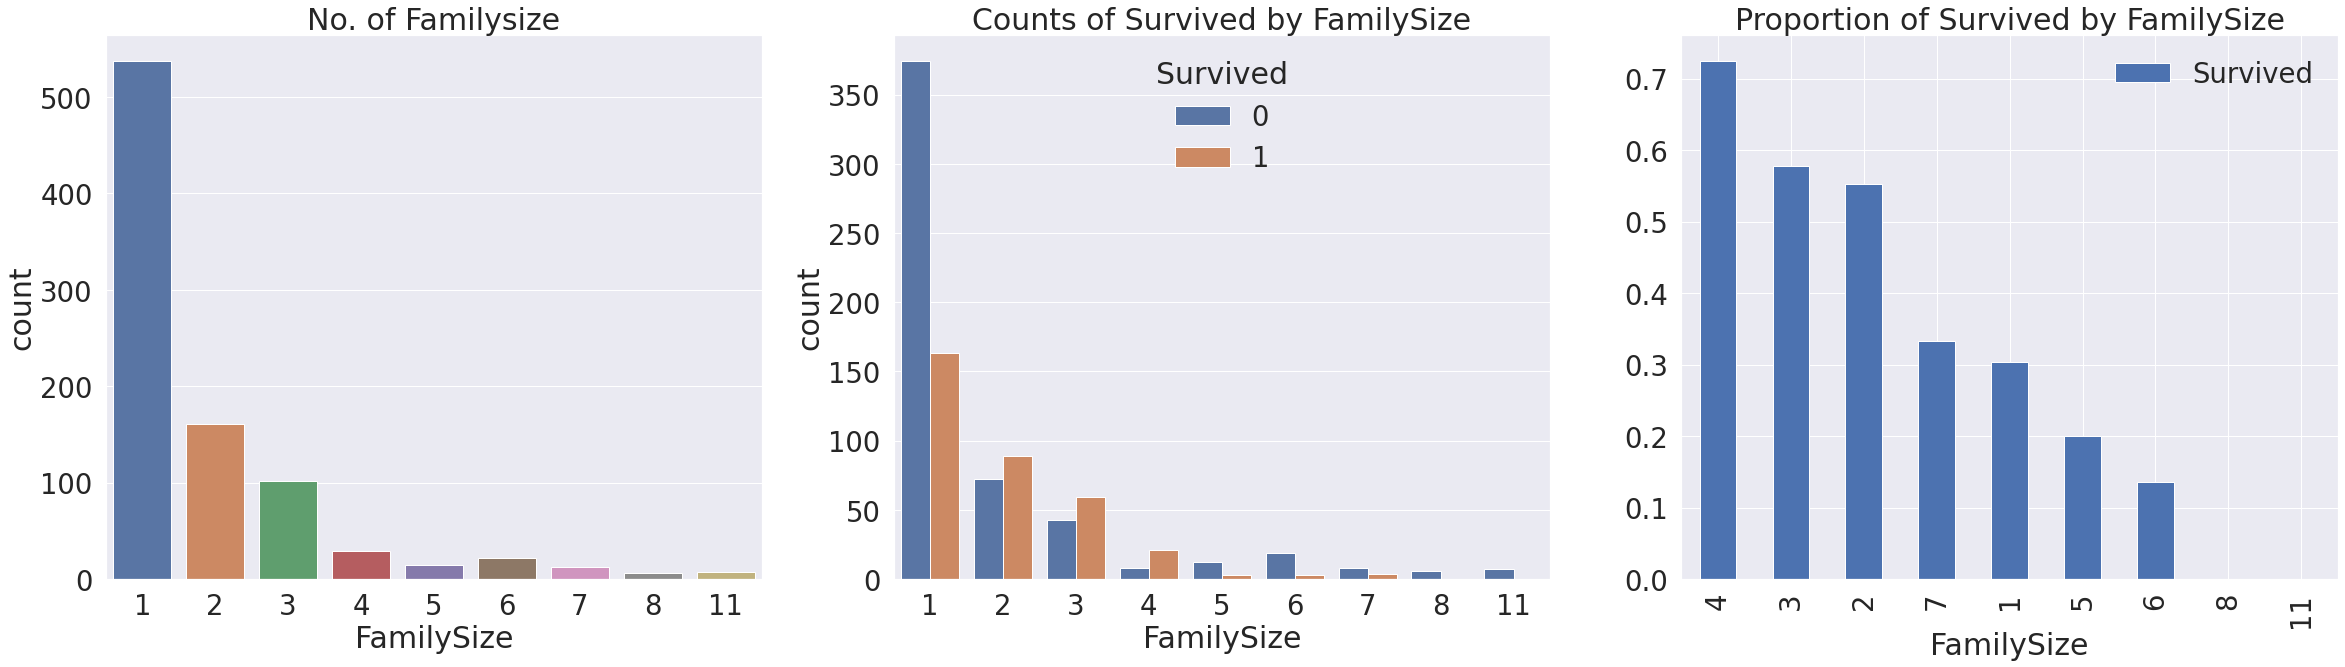

In [41]:
f, ax= plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=train, ax=ax[0])
ax[0].set_title('No. of Familysize')
sns.countplot('FamilySize', data=train, hue='Survived', ax=ax[1])
ax[1].set_title('Counts of Survived by FamilySize')
train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Proportion of Survived by FamilySize')

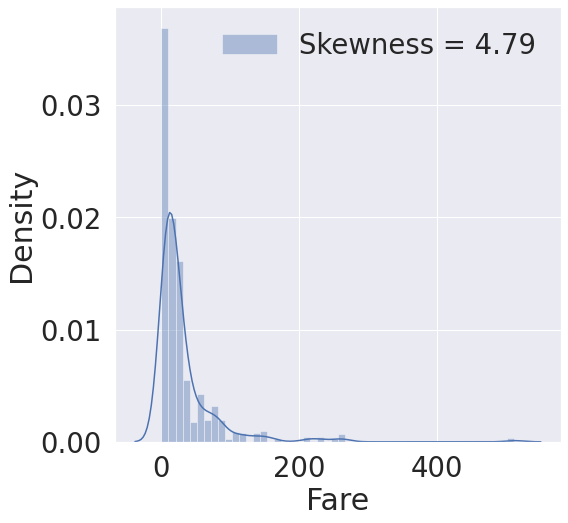

In [42]:
f, ax= plt.subplots(1, 1, figsize=(8, 8))
g=sns.distplot(train['Fare'], color='b', label='Skewness = {:.2f}'.format(train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [43]:
test.loc[test.Fare.isnull(), 'Fare']=test['Fare'].mean()

train['Fare']=train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
test['Fare']=test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

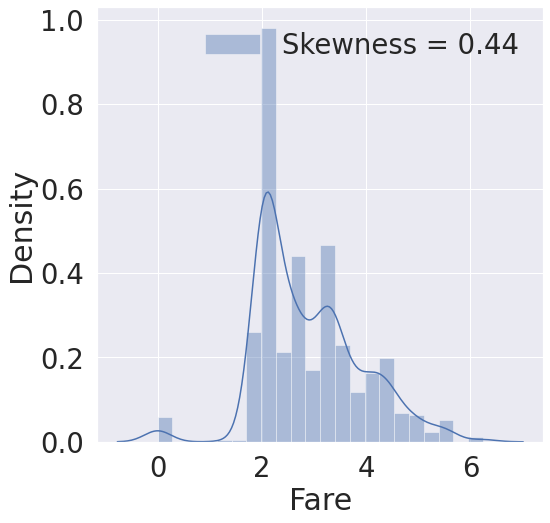

In [44]:
f, ax= plt.subplots(1, 1, figsize=(8, 8))
g=sns.distplot(train['Fare'], color='b', label='Skewness = {:.2f}'.format(train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [45]:
#Feature Engineering - Null 값을 채우기 위한 작업 = title + statistics 이때 title이란, 이름 앞에 Miss, Mrr, Mrs 같은 것..
#string extracting...정규표현식으로 나타내며, 이에 extract method가 사용됨 

train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')
test['Initial']=test.Name.str.extract('([A-Za-z]+)\.')

In [46]:
pd.crosstab(train.Initial, train.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [47]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='summer_r')
#이를 이용해 여자가 주로 사용하는 title을 구분해보자.

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [48]:
#복붙한 내용...
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [49]:
train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


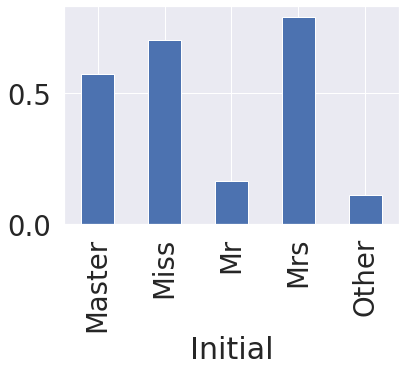

In [50]:
train.groupby("Initial")['Survived'].mean().plot.bar()

In [51]:
#Null-value 채우기 프로젝트

train.loc[(train.Age.isnull())&(train.Initial=='Master'), 'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'), 'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Mr'), 'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'), 'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Other'), 'Age']=46

test.loc[(test.Age.isnull())&(test.Initial=='Master'), 'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'), 'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Mr'), 'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'), 'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Other'), 'Age']=46

In [52]:
print('Null-value의 갯수 in Embarked =', train["Embarked"].isnull().sum())

Null-value의 갯수 in Embarked = 2


In [53]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
train.loc[(train["Embarked"].isnull()), 'Embarked']='S'

In [55]:
train.Embarked.value_counts()
#Embarked의 null value는 모두 계산됨

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
#Age null-value를 없애보자!
print(train.Age.max())

80.0


In [57]:
# 1st method=using loc func
train['Age_category']=0
train.loc[train.Age<10, 'Age_category']=0
train.loc[(10<=train.Age)&(train.Age<20), 'Age_category']=1
train.loc[(20<=train.Age)&(train.Age<30), 'Age_category']=2
train.loc[(30<=train.Age)&(train.Age<40), 'Age_category']=3
train.loc[(40<=train.Age)&(train.Age<50), 'Age_category']=4
train.loc[(50<=train.Age)&(train.Age<60), 'Age_category']=5
train.loc[(60<=train.Age)&(train.Age<70), 'Age_category']=6
train.loc[(70<=train.Age)&(train.Age<=80), 'Age_category']=7

In [58]:
test['Age_category']=0
test.loc[test.Age<10, 'Age_category']=0
test.loc[(10<=test.Age)&(test.Age<20), 'Age_category']=1
test.loc[(20<=test.Age)&(test.Age<30), 'Age_category']=2
test.loc[(30<=test.Age)&(test.Age<40), 'Age_category']=3
test.loc[(40<=test.Age)&(test.Age<50), 'Age_category']=4
test.loc[(50<=test.Age)&(test.Age<60), 'Age_category']=5
test.loc[(60<=test.Age)&(test.Age<70), 'Age_category']=6
test.loc[(70<=test.Age)&(test.Age<=80), 'Age_category']=7

In [59]:
#2nd method=using apply
def Age_categorization(x):
  if x<10:
    return 0
  if 10<=x<20:
    return 1
  if 20<=x<30:
    return 2
  if 30<=x<40:
    return 3
  if 40<=x<50:
    return 4
  if 50<=x<60:
    return 5
  if 60<=x<70:
    return 6
  if 70<=x<=80:
    return 7  
  
train["Age_category_2"]=train['Age'].apply(Age_categorization)

In [60]:
print((train["Age_category"]==train["Age_category_2"]).all())
#all()=모든 인수가 동일하면 True, 즉 결과는 같음

True


In [61]:
train.drop(['Age'], axis=1, inplace=True) 
#changing Age 끝!

In [62]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_category,Age_category_2
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,2.564949,NaN,S,1,Other,2,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,3.401197,B42,S,1,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,3.154870,NaN,S,4,Miss,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,3.401197,C148,C,1,Mr,2,2


In [63]:
train.Initial=train.Initial.map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Others' : 4})
test.Initial=test.Initial.map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Others' : 4})

In [65]:
train.Initial.value_counts()

2.0    529
1.0    186
3.0    127
0.0     40
Name: Initial, dtype: int64

In [66]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
train.Embarked=train.Embarked.map({'S' : 0, 'C' : 1, 'Q' : 2})
test.Embarked=test.Embarked.map({'S' : 0, 'C' : 1, 'Q' : 2})

In [70]:
train.Embarked.isnull().any()
#Embarked column에 null value가 없다.

False

In [71]:
train.Sex=train.Sex.map({'female':0, 'male':1})
test.Sex=test.Sex.map({'female':0, 'male':1})

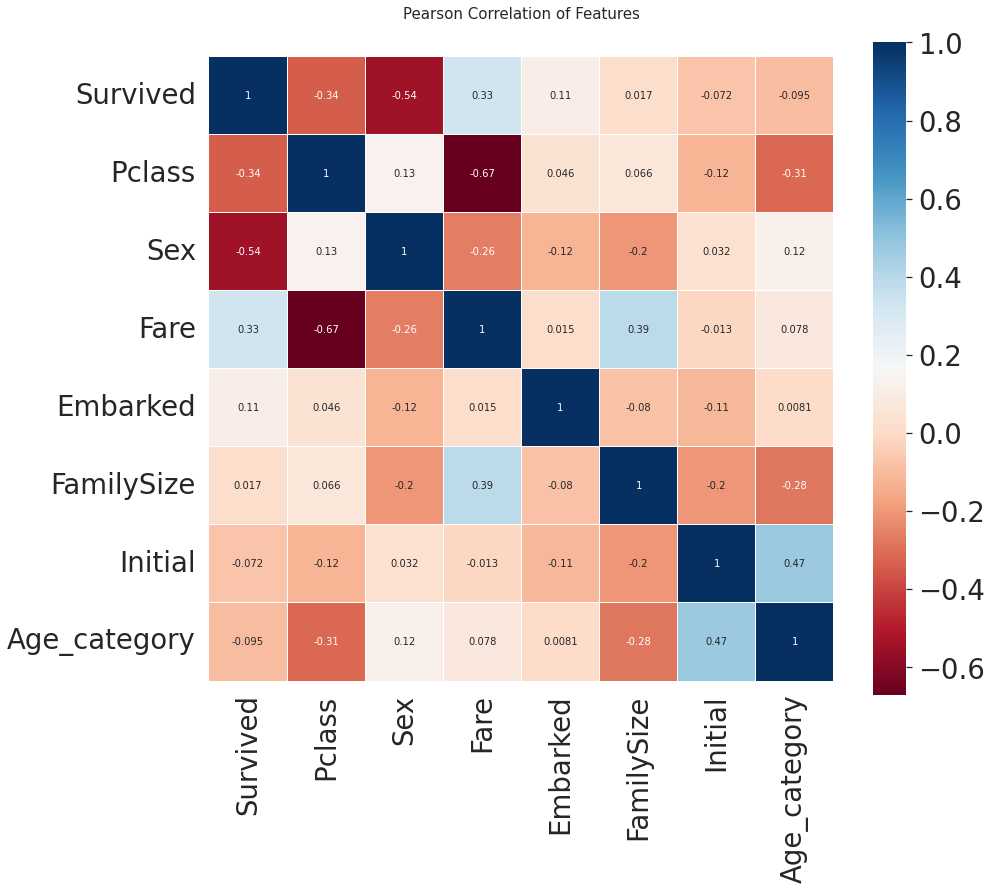

In [76]:
#Pearson Correlation : 두 변수 사이의 상관관계 => -1: 음의 상관, 1: 양의 상관, 0:상관 x
#heatmap data ex) baseball hot&cold zone => corr() method, seaborn
heatmap_data=train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_category']]
colormap=plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
del heatmap_data

In [79]:
#pre-processing
#One-Hot-Encoding
train=pd.get_dummies(train, columns=['Initial'], prefix='Initial')

KeyError: ignored

In [80]:
test=pd.get_dummies(test, columns=['Initial'], prefix='Initial')

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_category,Age_category_2,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,0,2,2,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,1,2,3,3,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,0,1,2,2,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,0,2,3,3,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,0,1,3,3,0,0,1,0


In [82]:
train=pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test=pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')


In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_category,Age_category_2,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,3,0,0,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,2,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,3,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,3,0,0,1,0,1,0,0


In [86]:
train=train.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','PassengerId'])
test=test.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','PassengerId'])

In [87]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_category,Age_category_2,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,2,0,0,1,0,1,0,0
1,1,1,0,4.266662,2,3,3,0,0,0,1,0,1,0
2,1,3,0,2.070022,1,2,2,0,1,0,0,1,0,0
3,1,1,0,3.972177,2,3,3,0,0,0,1,1,0,0
4,0,3,1,2.085672,1,3,3,0,0,1,0,1,0,0


In [88]:
#sklearn => ML model 만들기 for data analysis&ML, we should know what is sklearn
#titanic 현재상황=target value(Survived)= 0 or 1 => binary classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [90]:
#data를 train, valid, test로 나누자
X_train=train.drop('Survived', axis=1).values
target_label=train['Survived'].values
X_test=test.values

In [91]:
X_tr, X_vld, y_tr, y_vld=train_test_split(X_train, target_label, test_size=0.3, random_state=2018)


In [92]:
model=RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction=model.predict(X_vld)
#모델 세우고 예측까지 한 것

In [93]:
print("We have {:.2f}% of accuracy at predicting Survival of {} numbers of people".format(100*metrics.accuracy_score(prediction, y_vld), y_vld.shape[0]))
#prediction값과 y_valid값 사이의 정확도를 서술하는것


We have 82.46% of accuracy at predicting Survival of 268 numbers of people


In [94]:
#Feature Importance
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)


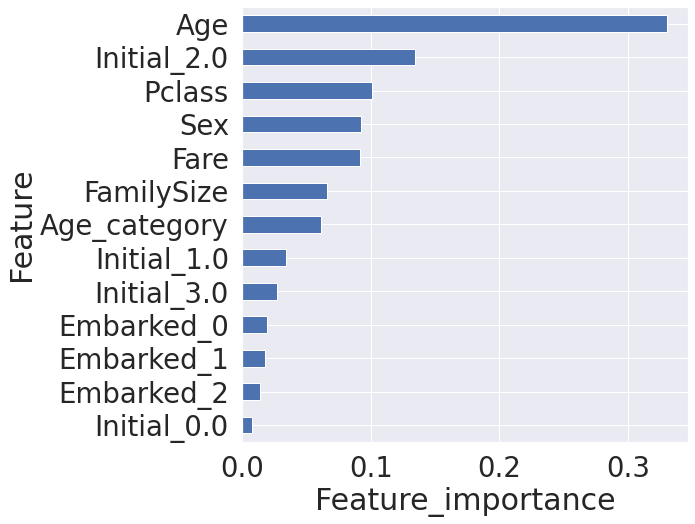

In [97]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature_importance')
plt.ylabel('Feature')
plt.show()

In [98]:
submission=pd.read_csv("/content/drive/MyDrive/chahj578@korea.ac.kr 2022-11-29 16:55/Colab Notebooks/data/titanic/gender_submission.csv")



In [99]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [100]:
prediction=model.predict(X_test)
submission.Survived=prediction

In [101]:
submission.to_csv('./titanic_submission_3rd.csv', index=False)